# Audit Task


In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
data = pd.read_csv("trial.csv")

In [3]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    776 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [5]:
data = data.drop(columns = ['LOCATION_ID'])
data.head()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
data.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.119412,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.565468,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.587500,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [7]:
data['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

# Missing Values

In [8]:
data.isnull().sum()

Sector_score     0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

array([[<AxesSubplot:title={'center':'Sector_score'}>,
        <AxesSubplot:title={'center':'PARA_A'}>,
        <AxesSubplot:title={'center':'SCORE_A'}>,
        <AxesSubplot:title={'center':'PARA_B'}>],
       [<AxesSubplot:title={'center':'SCORE_B'}>,
        <AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'numbers'}>,
        <AxesSubplot:title={'center':'Marks'}>],
       [<AxesSubplot:title={'center':'Money_Value'}>,
        <AxesSubplot:title={'center':'MONEY_Marks'}>,
        <AxesSubplot:title={'center':'District'}>,
        <AxesSubplot:title={'center':'Loss'}>],
       [<AxesSubplot:title={'center':'LOSS_SCORE'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'History_score'}>,
        <AxesSubplot:title={'center':'Score'}>],
       [<AxesSubplot:title={'center':'Risk'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

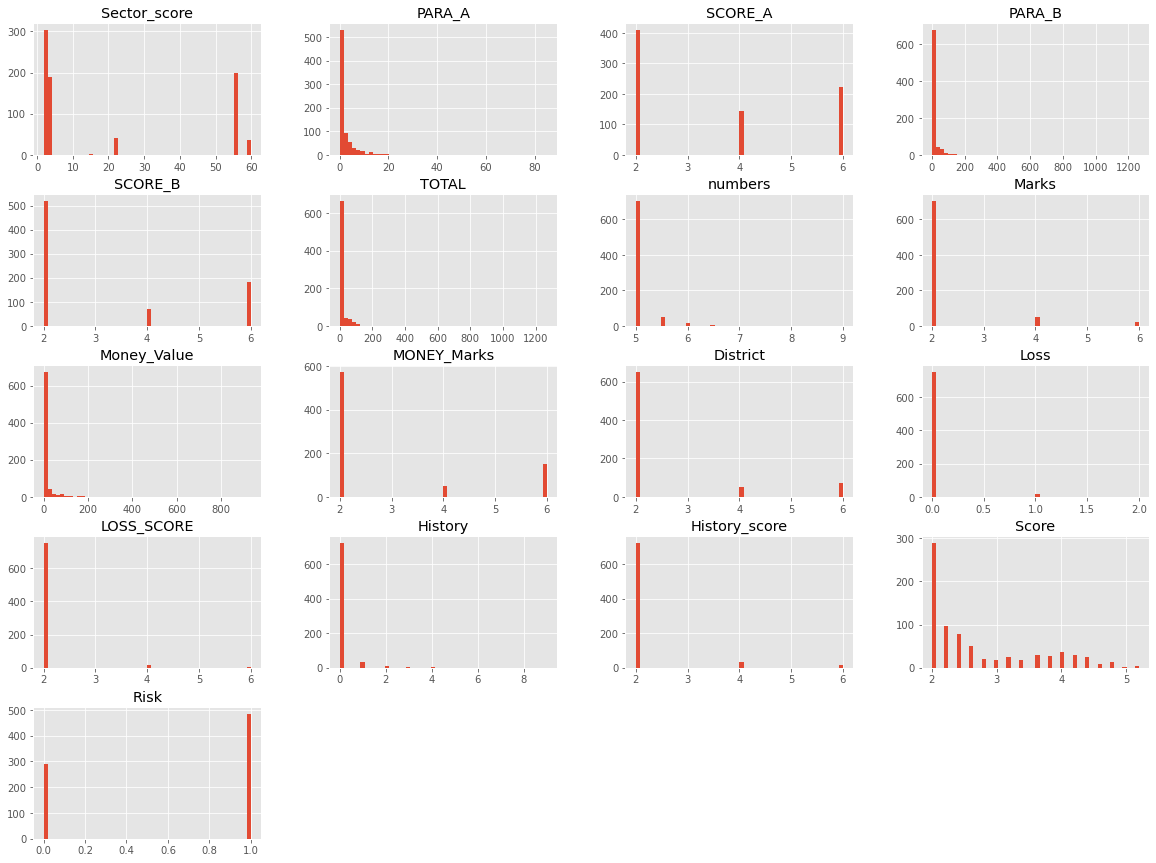

In [9]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

# Correlation matrix

In [10]:
data.corr()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.000000,-0.216824,-0.425198,-0.132670,-0.218967,-0.153316,-0.151840,-0.170404,-0.117824,-0.318910,-0.108202,-0.083153,-0.086750,-0.114798,-0.136900,-0.337326,-0.374588
PARA_A,-0.216824,1.000000,0.496680,0.161940,0.358550,0.267042,0.133786,0.140648,0.449368,0.285991,0.127804,0.045393,0.043707,0.118279,0.172635,0.426659,0.292425
SCORE_A,-0.425198,0.496680,1.000000,0.249438,0.572655,0.297547,0.242692,0.274594,0.206262,0.478876,0.088662,0.093345,0.093648,0.177932,0.265322,0.720488,0.671863
PARA_B,-0.132670,0.161940,0.249438,1.000000,0.347568,0.994100,0.209855,0.230851,0.125084,0.314548,0.082944,0.044813,0.042551,0.203582,0.316541,0.397155,0.162807
SCORE_B,-0.218967,0.358550,0.572655,0.347568,1.000000,0.379336,0.277576,0.313798,0.205257,0.567591,-0.004654,0.098870,0.092567,0.200841,0.309505,0.901276,0.515045
TOTAL,-0.153316,0.267042,0.297547,0.994100,0.379336,1.000000,0.217641,0.238237,0.168727,0.337467,0.093342,0.048863,0.046471,0.210752,0.326396,0.433828,0.190793
numbers,-0.151840,0.133786,0.242692,0.209855,0.277576,0.217641,1.000000,0.908140,0.186245,0.446666,0.125010,-0.001484,0.035807,0.202327,0.209598,0.502827,0.197750
Marks,-0.170404,0.140648,0.274594,0.230851,0.313798,0.238237,0.908140,1.000000,0.220411,0.507248,0.150369,0.004761,0.036899,0.226177,0.248423,0.565976,0.228098
Money_Value,-0.117824,0.449368,0.206262,0.125084,0.205257,0.168727,0.186245,0.220411,1.000000,0.391436,0.028340,0.024575,0.031825,0.080130,0.112244,0.291900,0.160893
MONEY_Marks,-0.318910,0.285991,0.478876,0.314548,0.567591,0.337467,0.446666,0.507248,0.391436,1.000000,0.081098,0.118674,0.129921,0.246881,0.334714,0.758327,0.440226


<AxesSubplot:>

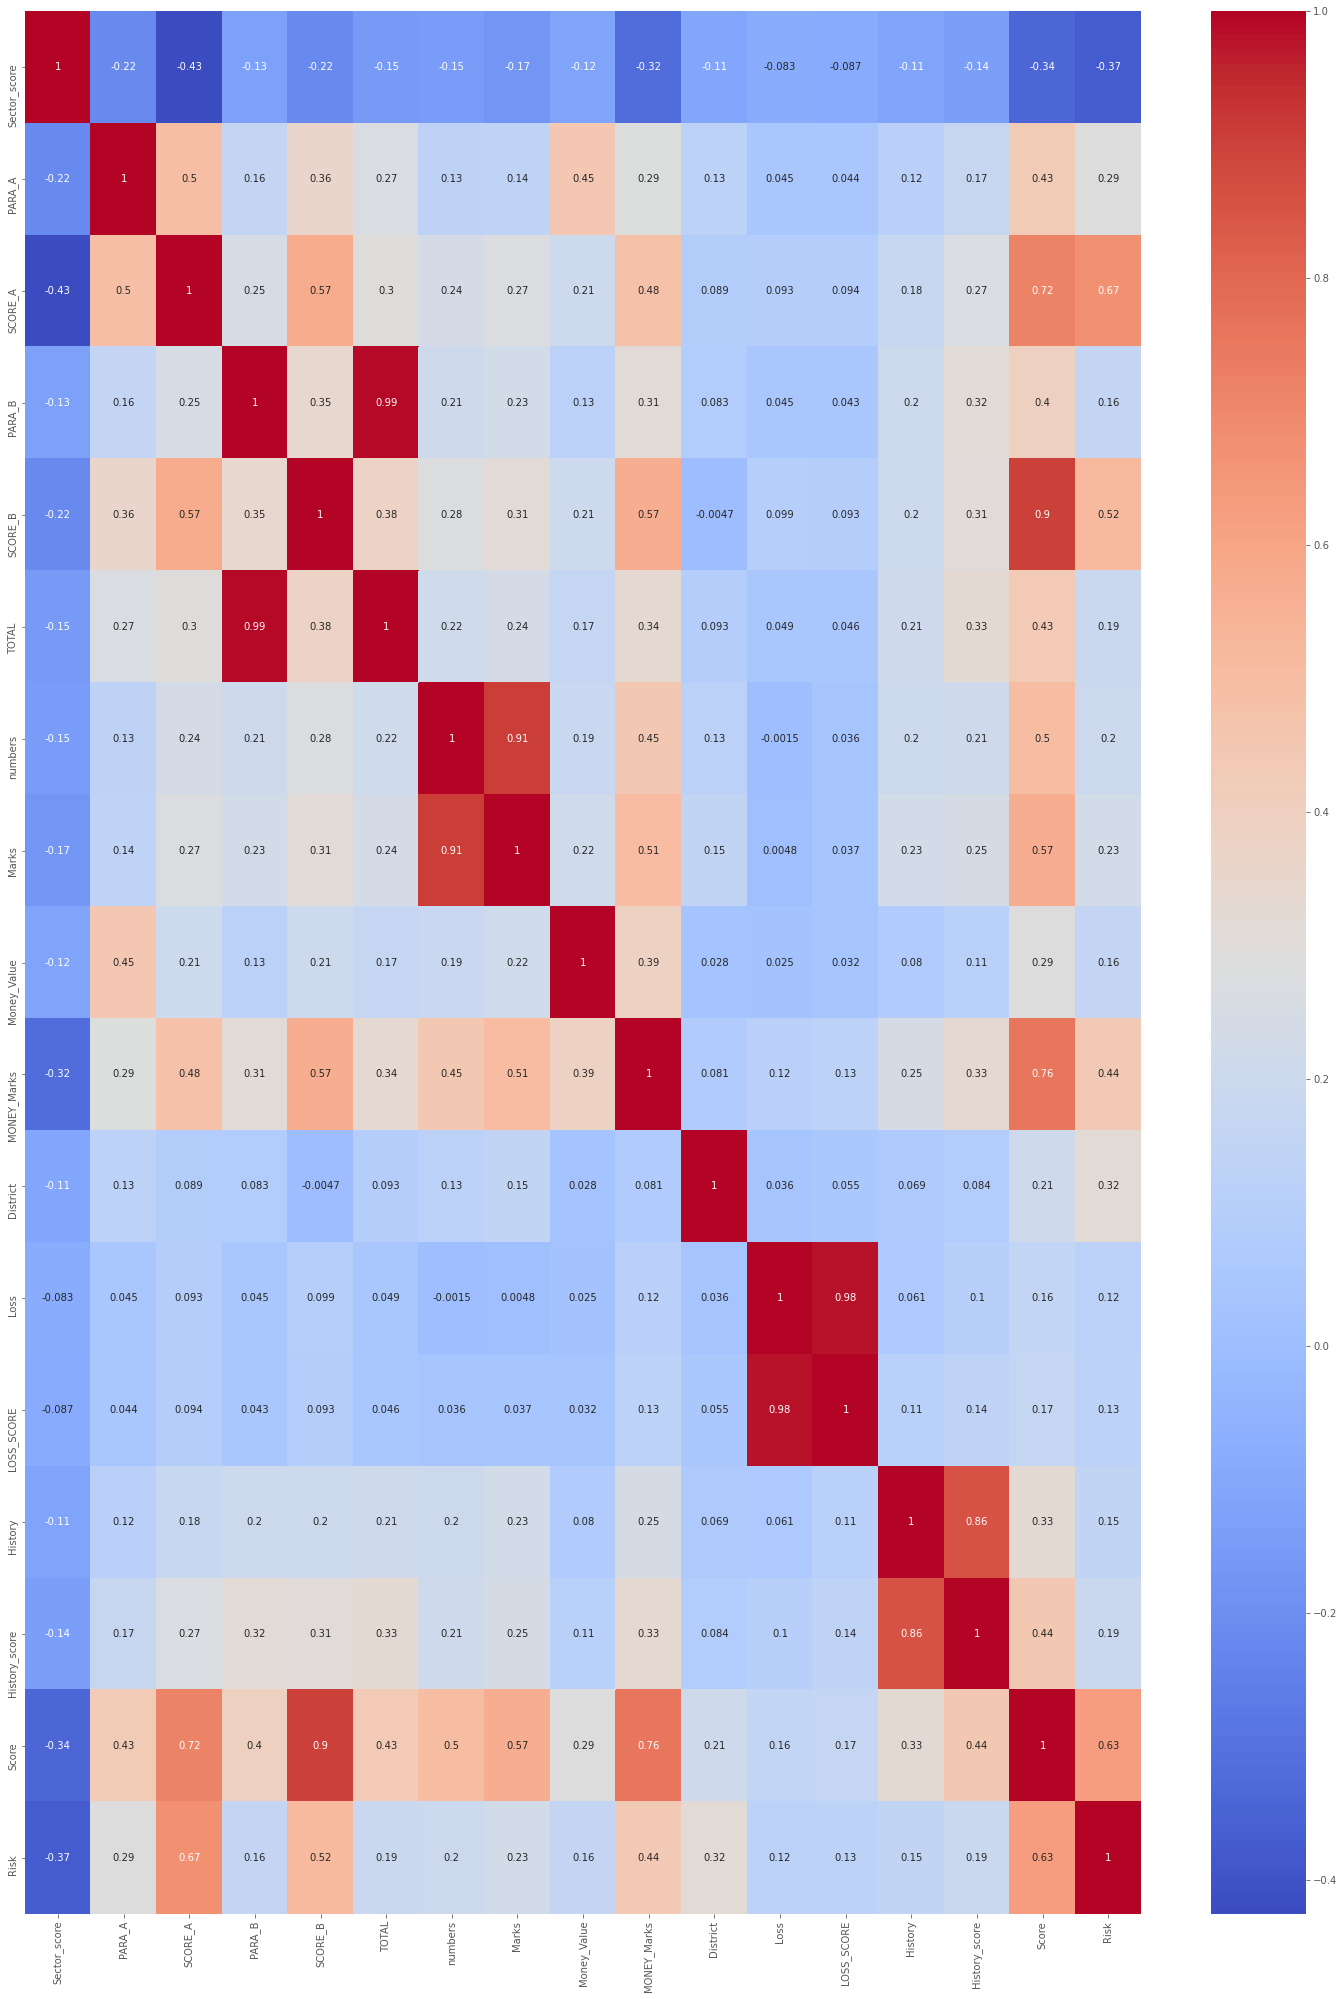

In [11]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(25,35))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [12]:
colors = ['red', 'blue']
Risk = [0,1]

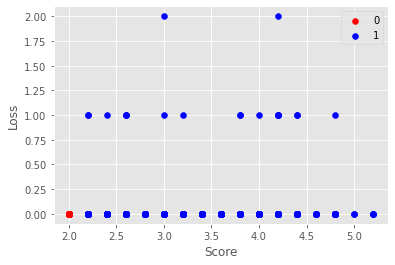

In [13]:
for i in range(2):
    x = data[data['Risk'] == Risk[i]]
    plt.scatter(x['Score'], x['Loss'], c = colors[i], label=Risk[i])
plt.xlabel("Score")
plt.ylabel("Loss")
plt.legend()

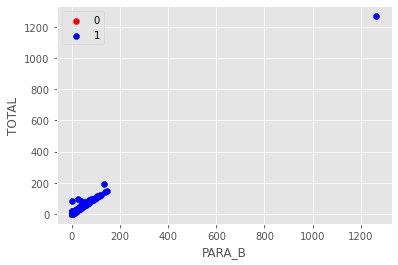

In [14]:
for i in range(2):
    x = data[data['Risk'] == Risk[i]]
    plt.scatter(x['PARA_B'], x['TOTAL'], c = colors[i], label=Risk[i])
plt.xlabel("PARA_B")
plt.ylabel("TOTAL")
plt.legend()

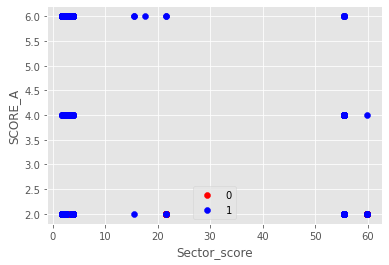

In [15]:
for i in range(2):
    x = data[data['Risk'] == Risk[i]]
    plt.scatter(x['Sector_score'], x['SCORE_A'], c = colors[i], label=Risk[i])
plt.xlabel("Sector_score")
plt.ylabel("SCORE_A")
plt.legend()

# Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data['Risk'] = le.fit_transform(data['Risk'])
data.head()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


# Model Training

# Logistic reggression

In [18]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['Risk'])
Y = data['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [19]:
X.columns

Index(['Sector_score', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL',
       'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History', 'History_score', 'Score'],
      dtype='object')

In [20]:
num_cols=['Sector_score', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL',
       'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History', 'History_score', 'Score']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols)
])

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [23]:
p.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['Sector_score', 'PARA_A',
                                                   'SCORE_A', 'PARA_B',
                                                   'SCORE_B', 'TOTAL',
                                                   'numbers', 'Marks',
                                                   'Money_Value', 'MONEY_Marks',
                                                   'District', 'Loss',
                                                   'LOSS_SCORE', 'History',
                                                   'History_score',
                                                   'Score'])])),
                ('mod', LogisticRegression(random_state=0))])

In [24]:
print("Accuracy: ",p.score(X_test, y_test) * 100)

Accuracy:  99.35897435897436


In [25]:
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [26]:
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [28]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[58,  0],
       [ 1, 97]], dtype=int64)

In [29]:
p.classes_

array([0, 1], dtype=int64)

In [30]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[97,  1],
       [ 0, 58]], dtype=int64)

In [31]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([97,  1,  0, 58], dtype=int64)

In [32]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [33]:
precision = tp/(tp+fp)
precision

1.0

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [35]:
precision_score(y_test, preds)

1.0

In [36]:

recall_score(y_test, preds)

0.9897959183673469

In [37]:
f1_score(y_test, preds)

0.9948717948717948

In [38]:
fbeta_score(y_test, preds, beta=0.5)

0.9979423868312757

In [39]:
fbeta_score(y_test, preds, beta=2)

0.9918200408997956

In [40]:
matthews_corrcoef(y_test, preds)

0.986417617625071

In [41]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

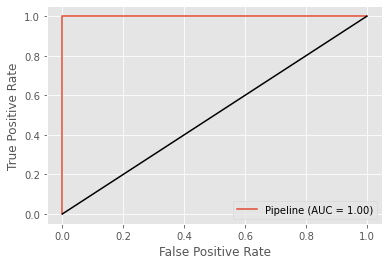

In [42]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
plot_roc_curve(p, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [43]:
y_test.value_counts()

1    98
0    58
Name: Risk, dtype: int64

In [44]:
58/(98+58)

0.3717948717948718

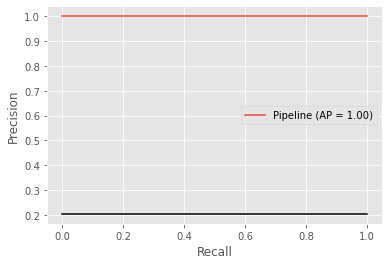

In [45]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
p = Pipeline([
    ('ct', ct),
    ('mod', DecisionTreeClassifier(random_state=0))
])

In [48]:
p.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['Sector_score', 'PARA_A',
                                                   'SCORE_A', 'PARA_B',
                                                   'SCORE_B', 'TOTAL',
                                                   'numbers', 'Marks',
                                                   'Money_Value', 'MONEY_Marks',
                                                   'District', 'Loss',
                                                   'LOSS_SCORE', 'History',
                                                   'History_score',
                                                   'Score'])])),
                ('mod', DecisionTreeClassifier(random_state=0))])

In [49]:
print("Accuracy: ",p.score(X_test, y_test) * 100)

Accuracy:  100.0


In [50]:
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [51]:
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[58,  0],
       [ 0, 98]], dtype=int64)

In [53]:
p.classes_

array([0, 1], dtype=int64)

In [54]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[98,  0],
       [ 0, 58]], dtype=int64)

In [55]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([98,  0,  0, 58], dtype=int64)

In [56]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [57]:
precision = tp/(tp+fp)
precision

1.0

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [59]:
precision_score(y_test, preds)

1.0

In [60]:
recall_score(y_test, preds)

1.0

In [61]:
f1_score(y_test, preds)

1.0

In [62]:
fbeta_score(y_test, preds, beta=0.5)

1.0

In [63]:
fbeta_score(y_test, preds, beta=2)

1.0

In [64]:
matthews_corrcoef(y_test, preds)

1.0

In [65]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

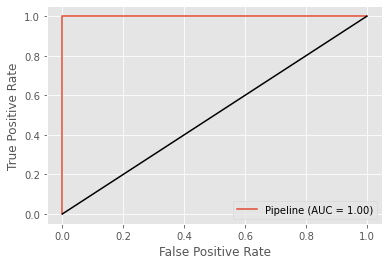

In [66]:
plot_roc_curve(p, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [67]:
y_test.value_counts()

1    98
0    58
Name: Risk, dtype: int64

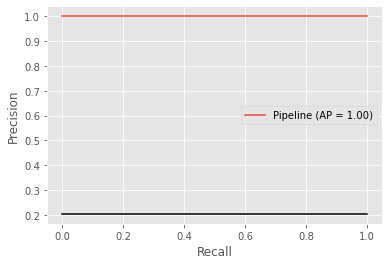

In [68]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')